In [45]:
!pip install kaggle

In [46]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [47]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [49]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [50]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [57]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("the number of images",file_count)

the number of images 25000


In [58]:
file_names= os.listdir('/content/train')
print(file_names)

['cat.712.jpg', 'cat.2817.jpg', 'cat.1587.jpg', 'cat.11513.jpg', 'dog.8522.jpg', 'dog.5417.jpg', 'dog.4098.jpg', 'cat.5489.jpg', 'cat.7298.jpg', 'cat.4808.jpg', 'dog.2397.jpg', 'dog.9342.jpg', 'dog.8953.jpg', 'cat.10585.jpg', 'cat.7732.jpg', 'cat.10375.jpg', 'dog.100.jpg', 'cat.1550.jpg', 'dog.1533.jpg', 'cat.6663.jpg', 'dog.2230.jpg', 'cat.822.jpg', 'cat.9579.jpg', 'cat.5972.jpg', 'dog.3922.jpg', 'dog.8873.jpg', 'cat.2242.jpg', 'dog.9708.jpg', 'dog.10868.jpg', 'dog.7551.jpg', 'dog.4606.jpg', 'cat.5793.jpg', 'dog.4303.jpg', 'cat.7931.jpg', 'dog.739.jpg', 'cat.8606.jpg', 'cat.2733.jpg', 'cat.2379.jpg', 'cat.12490.jpg', 'dog.10097.jpg', 'dog.8971.jpg', 'cat.3816.jpg', 'cat.5324.jpg', 'dog.7091.jpg', 'cat.1559.jpg', 'dog.7711.jpg', 'cat.4397.jpg', 'cat.4598.jpg', 'dog.4765.jpg', 'dog.6548.jpg', 'cat.1110.jpg', 'dog.9300.jpg', 'dog.7654.jpg', 'cat.6163.jpg', 'dog.3593.jpg', 'cat.8390.jpg', 'cat.1128.jpg', 'dog.11412.jpg', 'dog.12186.jpg', 'dog.1648.jpg', 'cat.3405.jpg', 'dog.5484.jpg', 'do

In [53]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

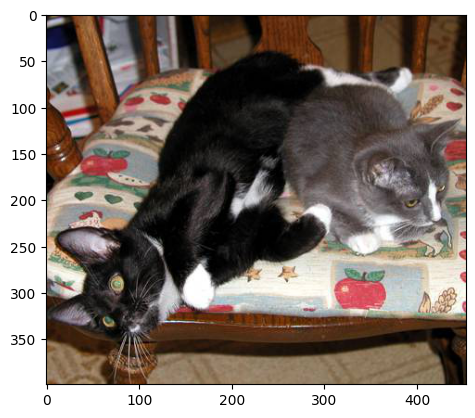

In [59]:
img=mpimg.imread('/content/train/cat.7298.jpg')
imgplt=plt.imshow(img)
plt.show()

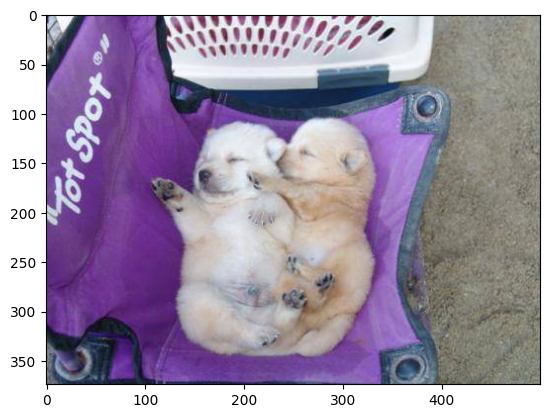

In [60]:
img=mpimg.imread('/content/train/dog.2397.jpg')
imgplt=plt.imshow(img)
plt.show()

In [62]:
file_name=os.listdir('/content/train/')
for i in range(5):
  name=file_name[i]
  print(name[0:3])


cat
cat
cat
cat
dog


In [63]:
file_name=os.listdir('/content/train/')
dog_count=0
cat_count=0
for img_file in file_name:
  name=img_file[0:3]
  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1
print("Number of dog images",dog_count)
print("Number of cat images",cat_count)

Number of dog images 12500
Number of cat images 12500


In [64]:
os.mkdir('/content/image resized')

FileExistsError: ignored

In [81]:
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  imgpath=original_folder+filename
  img=Image.open(imgpath)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newimgpath=resized_folder+filename
  img.save(newimgpath)

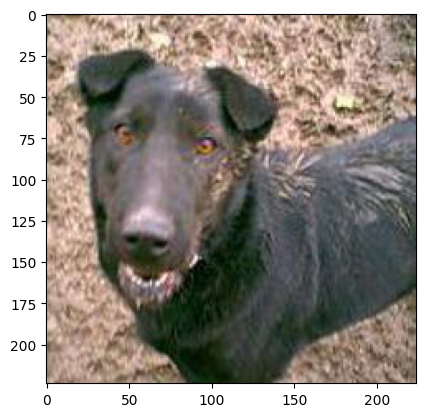

In [82]:
img=mpimg.imread('/content/image resized/dog.10205.jpg')
imgplt=plt.imshow(img)
plt.show()

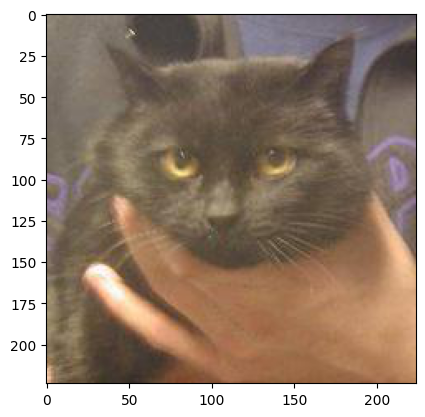

In [84]:
img=mpimg.imread('/content/image resized/cat.8683.jpg')
imgplt=plt.imshow(img)
plt.show()

In [85]:
 #cat-0, dog-1
file_names=os.listdir('/content/image resized/')
labels=[]

for i in range(2000):
  file_name=file_names[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)



In [86]:
print(file_names[0:5])
print(len(file_names))

['cat.712.jpg', 'cat.2817.jpg', 'cat.1587.jpg', 'cat.11513.jpg', 'dog.8522.jpg']
2000


In [87]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 1]
2000


In [88]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


In [89]:
#cat images are 979 and dog images are 1021
import cv2
import glob

In [90]:
img_directory='/content/image resized/'
img_extension=['png','jpg']
files=[]
[files.extend(glob.glob(img_directory+'*.'+e)) for e in img_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [92]:
print(dog_cat_images)

[[[[252 252 252]
   [231 231 231]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[254 254 254]
   [244 244 244]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[247 247 247]
   [245 245 245]
   [250 250 250]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[242 247 238]
   [251 255 251]
   [249 255 254]
   ...
   [128 133 132]
   [242 247 245]
   [251 255 254]]

  [[251 255 248]
   [248 255 248]
   [249 255 254]
   ...
   [160 165 164]
   [251 255 254]
   [251 255 254]]

  [[250 255 247]
   [232 240 230]
   [250 255 255]
   ...
   [214 219 218]
   [251 255 254]
   [243 248 246]]]


 [[[ 90  79  81]
   [ 91  80  82]
   [ 92  81  83]
   ...
   [208 195 197]
   [207 194 196]
   [207 194 196]]

  [[ 91  80  82]
   [ 91  80  82]
   [ 92  81  83]
   ...
   [209 196 198]
   [208 195 197]
   [208 195 197]]

  [[ 91  80  82]
   [ 92  81  83]
   [ 93  82  84]
   ...
   [209 196 198]
   [208 195 197]
   [209 196

In [93]:
type(dog_cat_images)

numpy.ndarray

In [94]:
print(dog_cat_images.shape)      #2000 images,224,224 pixels and 3 rgb value

(2000, 224, 224, 3)


In [95]:
X=dog_cat_images
Y=np.asarray(labels)

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [98]:
print(X.shape,X_train.shape,X_test.shape)     #1600 training data, 400 testing data

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [108]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [109]:
print(X_train_scaled)

[[[[0.01960784 0.02352941 0.0627451 ]
   [0.03137255 0.03529412 0.0745098 ]
   [0.02352941 0.02745098 0.06666667]
   ...
   [0.01176471 0.05098039 0.09019608]
   [0.01960784 0.05490196 0.09411765]
   [0.01568627 0.05098039 0.09019608]]

  [[0.         0.         0.03921569]
   [0.02745098 0.03137255 0.07058824]
   [0.04313725 0.04705882 0.08627451]
   ...
   [0.01960784 0.05882353 0.09803922]
   [0.01960784 0.05490196 0.09411765]
   [0.         0.03529412 0.0745098 ]]

  [[0.00784314 0.01176471 0.05098039]
   [0.03529412 0.03921569 0.07843137]
   [0.05490196 0.05882353 0.09803922]
   ...
   [0.04705882 0.08627451 0.1254902 ]
   [0.05882353 0.09411765 0.13333333]
   [0.03137255 0.06666667 0.10588235]]

  ...

  [[0.21176471 0.29411765 0.29803922]
   [0.12941176 0.21176471 0.21568627]
   [0.0627451  0.15294118 0.16078431]
   ...
   [0.02745098 0.05098039 0.03137255]
   [0.02352941 0.05490196 0.02745098]
   [0.02352941 0.05882353 0.01960784]]

  [[0.16470588 0.24705882 0.25098039]
   [0.1

In [101]:
#building the neural network
import tensorflow as tf
import tensorflow_hub as hub

In [102]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [103]:
no_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(no_of_classes)

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [104]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['acc']
    )

In [106]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.7679 - acc: 0.6144
Epoch 2/5
50/50 [==============================] - 54s 1s/step - loss: 0.6654 - acc: 0.6406
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.6646 - acc: 0.6425
Epoch 4/5
50/50 [==============================] - 54s 1s/step - loss: 0.6620 - acc: 0.6400
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.6620 - acc: 0.6375


In [110]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print("Test Loss=",score)
print("Test Accuracy=",acc)

13/13 [==============================] - 16s 1s/step - loss: 0.6637 - acc: 0.6225
Test Loss= 0.663688600063324
Test Accuracy= 0.6225000023841858


Path of the image to be predicted: /content/cat.jpg


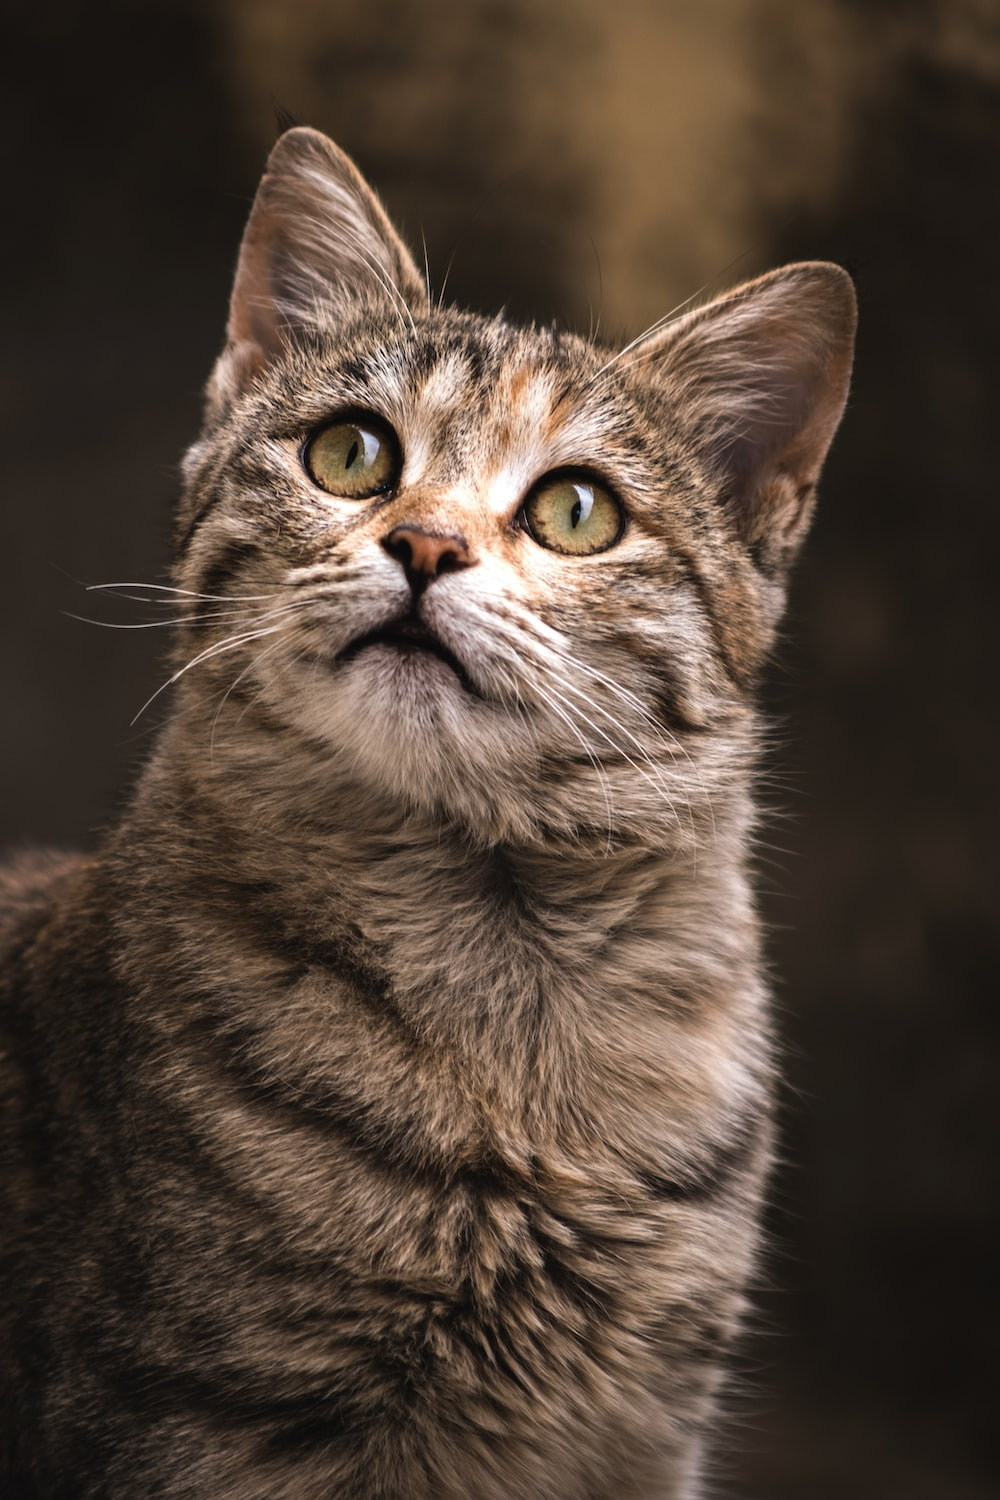

1/1 [==============================] - 0s 95ms/step
[[ 0.60573643 -1.983765  ]]
0
The image represents a Cat


In [118]:
#building a predictive model
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')